In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


Lets look at how the data is distributed

In [239]:
df_2011 = pd.read_csv('gt_2011.csv')

In [240]:
print(pd)

<module 'pandas' from 'C:\\Users\\DLK\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>


In [241]:
print(pd.__file__)

C:\Users\DLK\anaconda3\lib\site-packages\pandas\__init__.py


In [242]:
df_2011.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [243]:
df_2011_corr=df_2011.corr()

In [244]:
df_2011_corr

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.516885,-0.558459,-0.237350,-0.034682,0.027809,0.227810,-0.204208,-0.095782,-0.137913,-0.651208
AP,-0.516885,1.000000,0.054162,0.211877,0.115312,0.057592,-0.263607,0.197441,0.170852,0.122184,0.389866
AH,-0.558459,0.054162,1.000000,-0.094036,-0.210021,-0.226209,0.071037,-0.115355,-0.187764,0.136072,0.208756
AFDP,-0.237350,0.211877,-0.094036,1.000000,0.890633,0.790004,-0.741956,0.904976,0.899535,-0.363955,-0.037048
GTEP,-0.034682,0.115312,-0.210021,0.890633,1.000000,0.883438,-0.809538,0.977510,0.994556,-0.455637,-0.249617
TIT,0.027809,0.057592,-0.226209,0.790004,0.883438,1.000000,-0.451159,0.905240,0.893100,-0.650092,-0.231984
TAT,0.227810,-0.263607,0.071037,-0.741956,-0.809538,-0.451159,1.000000,-0.767597,-0.801215,0.045379,0.087566
TEY,-0.204208,0.197441,-0.115355,0.904976,0.977510,0.905240,-0.767597,1.000000,0.988446,-0.474459,-0.126402
CDP,-0.095782,0.170852,-0.187764,0.899535,0.994556,0.893100,-0.801215,0.988446,1.000000,-0.457052,-0.199862
CO,-0.137913,0.122184,0.136072,-0.363955,-0.455637,-0.650092,0.045379,-0.474459,-0.457052,1.000000,0.408052


there are many linear correlations here. the strongest indicator of CO appears to be TIT, and the strongest indicator of NOX appears to be AT. both with a linear corr of anout -.65.

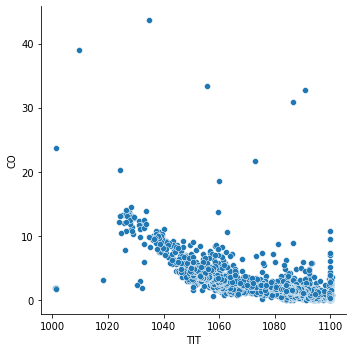

In [245]:
sns.relplot(x=df_2011['TIT'],y=df_2011['CO'])

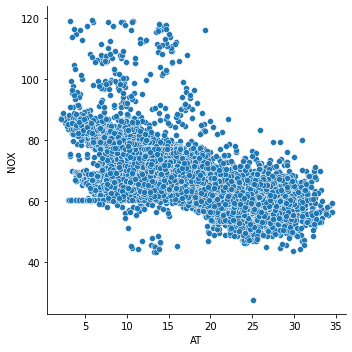

In [246]:
sns.relplot(x='AT',y='NOX',data=df_2011)

In [247]:
x=df_2011[list(df_2011)[0:9]]

In [248]:
kmeans = KMeans(n_clusters = 9, random_state = 0).fit(x)

In [249]:
kmeans.labels_

array([6, 6, 6, ..., 7, 7, 0])

In [250]:
len(df_2011['CO'].unique())

6970

In [251]:
len(df_2011['NOX'].unique())

6539

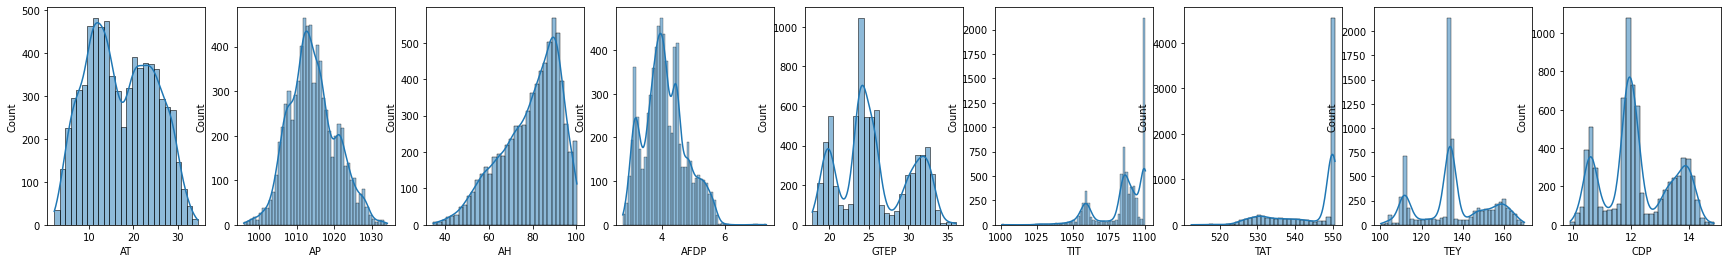

<Figure size 2160x1440 with 0 Axes>

In [252]:
#fig, axes = plt.subplots(1, 2)
#plt.figure(figsize=(15,4))
fig, axes = plt.subplots(1, 9,figsize=(30,4))
plt.figure(figsize=(30,20))
for count,x in enumerate(range(9)):
    sns.histplot(x=list(df_2011)[count],data=df_2011,kde=True,ax=axes[count])
#sns.histplot(x=list(df_2011)[4],data=df_2011,kde=True,ax=axes[1])


In [253]:
from sklearn.cluster import KMeans

In [254]:
x=df_2011[list(df_2011)[0:9]]

In [255]:
kmeans = KMeans(n_clusters=9, random_state=0).fit(x)

In [256]:
kmeans.labels_

array([6, 6, 6, ..., 7, 7, 0])

In [257]:
 kmeans.cluster_centers_[0]

array([  18.52630539, 1011.45263009,   88.34292526,    3.23817531,
         19.92699622, 1058.81447493,  549.63073794,  112.51047304,
         10.62416112])

In [258]:
df_2012=pd.read_csv('gt_2012.csv')

In [259]:
x2=df_2012[list(df_2012)[0:9]]

In [260]:
kmeans.predict(x2)

array([0, 0, 0, ..., 6, 6, 7])

In [261]:
kmeans.cluster_centers_

array([[  18.52630539, 1011.45263009,   88.34292526,    3.23817531,
          19.92699622, 1058.81447493,  549.63073794,  112.51047304,
          10.62416112],
       [  22.71029451, 1010.45934066,   74.7843033 ,    3.99453516,
          25.68608681, 1090.9543956 ,  549.14141758,  134.91516484,
          12.18221758],
       [  17.30436709, 1016.94710627,   67.93172983,    4.87087222,
          31.42530346, 1099.80550576,  532.91427657,  155.85704225,
          13.72730602],
       [  11.92225981, 1016.38090476,   86.9888    ,    4.98374362,
          31.95957524, 1099.70333333,  530.65021905,  159.36821905,
          13.87408952],
       [  14.68145186, 1012.04868486,   92.18046402,    4.01667577,
          24.39845988, 1086.14102564,  549.74938792,  133.48523573,
          11.90761208],
       [  23.95103696, 1012.7832337 ,   62.51129076,    3.26184293,
          20.34434511, 1060.90461957,  549.75222826,  112.26736413,
          10.72542391],
       [   8.75427099, 1020.54319249,   

In [262]:
df_2012.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [263]:
pca=PCA(2)

In [264]:
df_2012_pca=pca.fit_transform(df_2012)

In [265]:
df_2012_pca.shape

(7628, 2)

In [266]:
kmeans = KMeans(n_clusters = 9, random_state = 0)

In [267]:
label = kmeans.fit_predict(df_2012_pca)

In [268]:
print(label)

[6 6 6 ... 8 8 6]


In [269]:
label.shape

(7628,)

In [270]:
filtered_label0 = df_2012_pca[label==0]

In [271]:
filtered_label1 = df_2012_pca[label==1]

In [272]:
filtered_label2 = df_2012_pca[label==2]

In [273]:
filtered_label3 = df_2012_pca[label==3]

In [274]:
filtered_label4 = df_2012_pca[label==4]

In [275]:
filtered_label5 = df_2012_pca[label==5]

In [276]:
filtered_label6 = df_2012_pca[label==6]

In [277]:
filtered_label7 = df_2012_pca[label==7]

In [278]:
filtered_label8 = df_2012_pca[label==8]

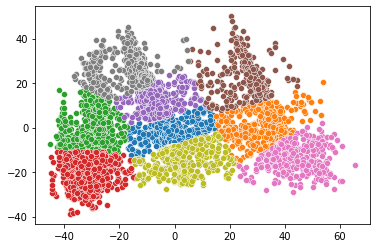

In [279]:
sns.scatterplot(x=filtered_label0 [:,0],y=filtered_label0[:,1] ,data=filtered_label0)
sns.scatterplot(x=filtered_label1 [:,0],y=filtered_label1[:,1] ,data=filtered_label1)
sns.scatterplot(x=filtered_label2 [:,0],y=filtered_label2[:,1] ,data=filtered_label2)
sns.scatterplot(x=filtered_label3 [:,0],y=filtered_label3[:,1] ,data=filtered_label3)
sns.scatterplot(x=filtered_label4 [:,0],y=filtered_label4[:,1] ,data=filtered_label4)
sns.scatterplot(x=filtered_label5 [:,0],y=filtered_label5[:,1] ,data=filtered_label5)
sns.scatterplot(x=filtered_label6 [:,0],y=filtered_label6[:,1] ,data=filtered_label6)
sns.scatterplot(x=filtered_label7 [:,0],y=filtered_label7[:,1] ,data=filtered_label6)
sns.scatterplot(x=filtered_label8 [:,0],y=filtered_label8[:,1] ,data=filtered_label8)



plt.show()
#Graphing of Kmeans Clustering

In [280]:
filtered_label8

array([[  4.68306631, -14.17842985],
       [  1.2283254 , -12.63542688],
       [  0.8869074 , -12.55741833],
       ...,
       [  1.08782409, -11.86651376],
       [  1.00406103, -11.07909571],
       [  1.48469746, -11.35550548]])

In [281]:
from sklearn.metrics  import silhouette_samples, silhouette_score

In [282]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
x2=df_2012[list(df_2012)[0:11]]

In [283]:
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters = n_clusters, random_state = 10)
    cluster_labels = clusterer.fit_predict(x2)
    silhouette_avg = silhouette_score(x2, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,)
    

For n_clusters = 2 The average silhouette_score is : 0.4288127327834139
For n_clusters = 3 The average silhouette_score is : 0.3866355751920787
For n_clusters = 4 The average silhouette_score is : 0.36846068399068116
For n_clusters = 5 The average silhouette_score is : 0.3786663258887034
For n_clusters = 6 The average silhouette_score is : 0.34515218334087844
For n_clusters = 7 The average silhouette_score is : 0.3403096335348069
For n_clusters = 8 The average silhouette_score is : 0.30880451221015853
For n_clusters = 9 The average silhouette_score is : 0.2990481222748443
For n_clusters = 10 The average silhouette_score is : 0.29877619997263144
For n_clusters = 11 The average silhouette_score is : 0.2823809304699127
For n_clusters = 12 The average silhouette_score is : 0.27283580773613875
For n_clusters = 13 The average silhouette_score is : 0.26629834590412177
For n_clusters = 14 The average silhouette_score is : 0.26299595624389127
For n_clusters = 15 The average silhouette_score is 

In [284]:
from sklearn import svm

In [285]:
df_2011.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [286]:
column_names = ['AT',"AP",'AH','AFDP','GTEP','TIT','TAT','CDP','CO' ,'NOX','TEY']

In [287]:
df_2011=df_2011.reindex(columns=column_names)

In [288]:
df_2011.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,11.898,0.32663,81.952,134.67
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,11.892,0.44784,82.377,134.67
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,12.042,0.45144,83.776,135.10
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,11.990,0.23107,82.505,135.03
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,11.910,0.26747,82.028,134.67


Atempting a linear regression to predict the 'TEY' (Total Energy Yield)

In [290]:
from sklearn import datasets, linear_model
x=df_2011[list(df_2011)[0:10]]
y=df_2011[list(df_2011)[10]]

In [291]:
from sklearn.model_selection import train_test_split

In [292]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state=42)

In [293]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [300]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg,x_train, y_train, cv=3)
scores

array([0.99790464, 0.99793675, 0.99788663])

In [294]:
y_pred = reg.predict(x_test)

In [295]:
y_pred

array([111.32946357, 133.8414274 , 111.94971375, ..., 133.37074562,
       147.70999889, 111.61537112])

In [296]:
print(reg.coef_)

[-0.35750994 -0.06742575 -0.00781843 -0.48076061  0.33651901  0.61229269
 -0.62943614  1.42535452  0.01784201 -0.01704961]


In [297]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

0.4782934842327573


In [298]:
 from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9982228583823174


<AxesSubplot:xlabel='TEY'>

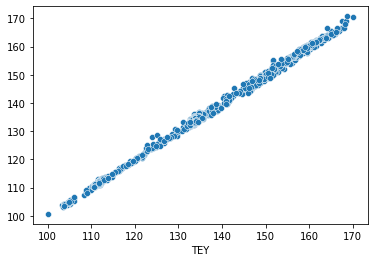

In [299]:
sns.scatterplot(x=y_test,y=y_pred)